In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 
from keras.utils.np_utils import to_categorical
import random

In [6]:
np.random.seed(0)

In [8]:
(X_train, y_train),(X_test, y_test) = mnist.load_data() 

11493376/11490434 [==============================] - 133s 12us/step


In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [13]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"




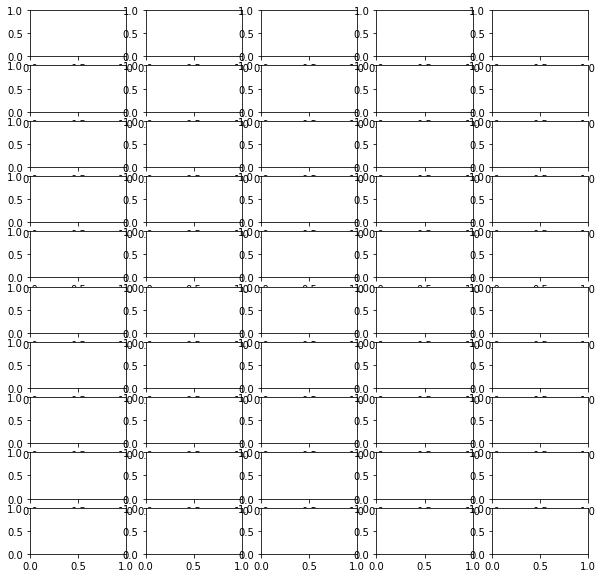

In [14]:
num_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize=(10, 10))